Predictions and simulations project

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

import statsmodels.formula.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
    
import matplotlib.pyplot as plt
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series

In [2]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [3]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [5]:
df.rename({"pm2.5": "pm"}, axis=1, inplace=True)

<AxesSubplot:>

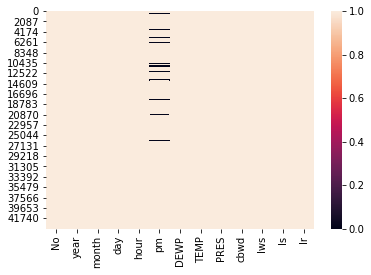

In [6]:
# co robimy z NaN'ami?
sns.heatmap(df.isna()==False)

In [7]:
datetime = df[['year', 'month', 'day', 'hour']]
datetime

,year,month,day,hour
0,2010,1,1,0
1,2010,1,1,1
2,2010,1,1,2
3,2010,1,1,3
4,2010,1,1,4
...,...,...,...,...
43819,2014,12,31,19
43820,2014,12,31,20
43821,2014,12,31,21
43822,2014,12,31,22


In [8]:
df['Datetime'] = pd.to_datetime(datetime)

In [9]:
df.head()

,No,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,Datetime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [10]:
# set up datetime column as index and delete nulls
df.index = df['Datetime']
del df['Datetime']
del df['No']
df.dropna(inplace=True)

In [11]:
df["pm"] = df["pm"].astype("int64")
df["TEMP"] = df["TEMP"].astype("int64")
df["PRES"] = df["PRES"].astype("int64")
df["Iws"] = df["Iws"].astype("int64")

43824 - 41757 = 2067 Na's were deleted

In [68]:
df.head()

,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,...,log_lag_pm,log_lag_pm2,log_lag_pm24,PM_ITS_model1,PM_ITS_model2,PM_OOS_model3,PM_ITS_model5,PM_OOS_model6,PM_Naive_Mean,PM_Naive_Last
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,2010.0,1.0,2.0,0.0,129.0,-16.0,-4.0,1020.0,SE,1.0,...,NaN,NaN,NaN,114.486597,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-02 01:00:00,2010.0,1.0,2.0,1.0,148.0,-15.0,-4.0,1020.0,SE,2.0,...,4.867534,NaN,NaN,121.454394,128.031458,NaN,NaN,NaN,NaN,NaN
2010-01-02 02:00:00,2010.0,1.0,2.0,2.0,159.0,-11.0,-5.0,1021.0,SE,3.0,...,5.003946,4.867534,NaN,175.498944,145.968757,NaN,147.292255,NaN,NaN,NaN
2010-01-02 03:00:00,2010.0,1.0,2.0,3.0,181.0,-7.0,-5.0,1022.0,SE,5.0,...,5.075174,5.003946,NaN,230.803907,156.312177,NaN,156.642018,NaN,NaN,NaN
2010-01-02 04:00:00,2010.0,1.0,2.0,4.0,138.0,-7.0,-5.0,1022.0,SE,6.0,...,5.204007,5.075174,NaN,211.548154,176.918108,NaN,178.245383,NaN,NaN,NaN


In [67]:
df.isna()

,year,month,day,hour,pm,DEWP,TEMP,PRES,cbwd,Iws,...,log_lag_pm,log_lag_pm2,log_lag_pm24,PM_ITS_model1,PM_ITS_model2,PM_OOS_model3,PM_ITS_model5,PM_OOS_model6,PM_Naive_Mean,PM_Naive_Last
Datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-02 00:00:00,False,False,False,False,False,False,False,False,False,False,...,True,True,True,False,True,True,True,True,True,True
2010-01-02 01:00:00,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,True,True,True,True,True
2010-01-02 02:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,True,True
2010-01-02 03:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,True,True
2010-01-02 04:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-12-31 20:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2014-12-31 21:00:00,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
%%markdown
## Data Exploration

## Data Exploration


([<matplotlib.axis.XTick at 0x1c411b79760>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

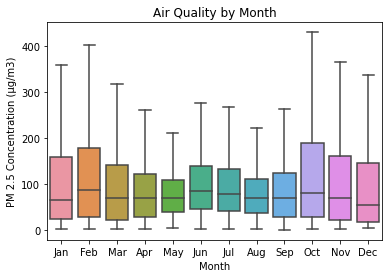

In [13]:
import calendar
# Plot PM 2.5 level by MONTH
plt.figure()
sns.boxplot(x="month", y="pm", data=df, showfliers=False)
plt.xlabel('Month')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality by Month')
plt.xticks(range(0,12), calendar.month_abbr[1:13])

Text(0.5, 1.0, 'Air Quality by Day')

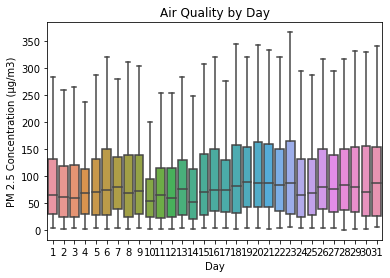

In [14]:
# Plot PM 2.5 level by DAY OF THE WEEK
plt.figure()
sns.boxplot(x="day", y="pm", data=df, showfliers=False)
plt.xlabel('Day')
plt.ylabel('PM 2.5 Concentration (μg/m3)')
plt.title('Air Quality by Day')
#plt.xticks(range(0,31), calendar.day_abbr[1:32])

<AxesSubplot:title={'center':'First day PM'}, xlabel='Datetime'>

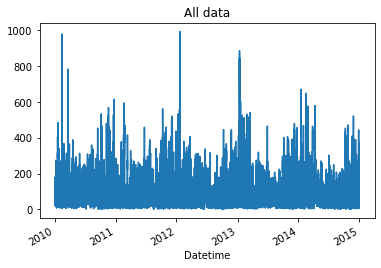

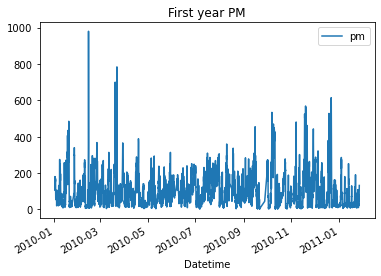

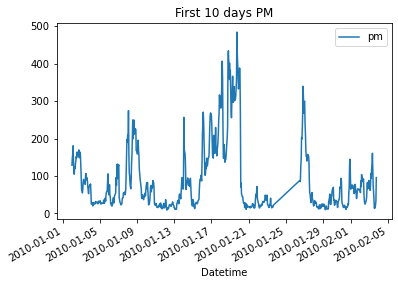

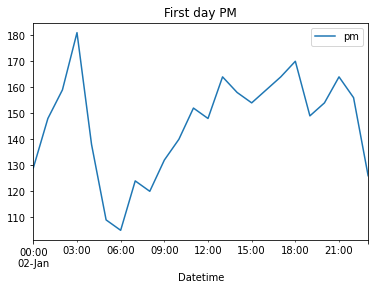

In [15]:
# plot PM variable
df['pm'].plot(title='All data')
df[0:24*30*12][['pm']].plot(title='First year PM')
df[0:24*30][['pm']].plot(title='First 10 days PM')
df[0:24][['pm']].plot(title='First day PM')

<AxesSubplot:title={'center':'Average and Median PM readings for each hour'}, xlabel='hour'>

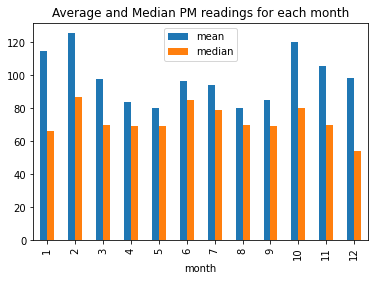

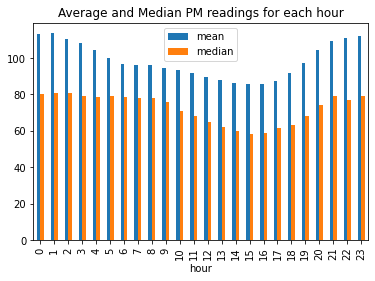

In [16]:
# plot the median and mean groups
df.groupby('month')['pm'].aggregate(['mean', 'median']).plot(kind="bar", title='Average and Median PM readings for each month')
df.groupby('hour')['pm'].aggregate(['mean', 'median']).plot(kind="bar", title='Average and Median PM readings for each hour')

In [17]:
%%markdown
## Feature Engineering

## Feature Engineering


In [18]:
# create a season variable with winter, spring, summer, fall instead of individual months

def season(month):
    if month in (4,5,6):
        return "spring"
    elif month in (7,8,9):
        return "summer"
    elif month in (10,11,12):
        return "fall"
    else:
        return "winter"
        
def season2(month):
    if month in (3, 4,5,6, 7, 8, 9):
        return "warm"
    elif month in (10, 11, 12 , 1, 2):
        return "cold"

df['season'] = df['month'].apply(season2)

In [19]:
# create a day time variable that aggregates hours into specific times of day

def day_time(hour):
    if hour in (20, 21, 22, 23, 0, 1, 2, 3, 4):
        return "night"
    elif hour in(5, 6, 7, 8, 9, 10, 11, 12):
        return "morning"
    else:
        return "afternoon"

df['day_time'] = df['hour'].apply(day_time)

In [20]:
# create a Trend variable to allow for time-series regression
df['Trend'] = np.arange(1, len(df) + 1)

# create a log pm2.5 variable
df['log_pm'] = np.log(df['pm']+1)

# create a one-hour lag variable 
df['log_lag_pm'] = df['log_pm'].shift(1)

# create a two-hour lag variable
df['log_lag_pm2'] = df['log_pm'].shift(2)

# create a 24-hour lag variable
df['log_lag_pm24'] = df['log_pm'].shift(24)

In [21]:
%%markdown
## Regression - In-the-Sample Prediction

## Regression - In-the-Sample Prediction


In [22]:
# set datetime frequency at hours
df = df.asfreq('h')

In [23]:
# split the dataset into train and test to allow for in and out of sample forecasts. Test dataset consists of one last month of observations
df_train = df[0:-365*24]
df_test = df[-365*24:]

In [24]:
%%markdown
### 1. First Model: All variables together

### 1. First Model: All variables together


In [25]:
# create model with formula
model_1 = sm.ols(formula="log_pm ~ Trend + C(year) + C(month) + C(hour) + DEWP + TEMP + PRES + C(cbwd) + Iws + Is + Ir", data=df)
results1 = model_1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pm   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     1018.
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:25:25   Log-Likelihood:                -43288.
No. Observations:               41757   AIC:                         8.667e+04
Df Residuals:                   41708   BIC:                         8.710e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            25.5522      0.724     35.273      0.000      24.132      26.972
C(year)[T.2011.0]    -1.3471      0.120    -11.227      0.000      -1.582      -1.112
C(year)[T.2012.0]    -2.7700      0.244    -11.374      0.000      -3.247      -2.293
C(year)[T.2013.0]    -3.9423      0.370    -10.660      0.000      -4.667      -3.217
C(year)[T.2014.0]    -5.3843      0.500    -10.777      0.000      -6.363      -4.405
C(month)[T.2.0]      -0.2972      0.020    -15.076      0.000      -0.336      -0.259
C(month)[T.3.0]      -0.7398      0.028    -26.571      0.000      -0.794      -0.685
C(month)[T.4.0]      -1.3842      0.039    -35.591      0.000      -1.460      -1.308
C(month)[T.5.0]      -2.0622      0.051    -40.832      0.000      -2.161      -1.963
C(month)[T.6.0]      -2.8794      0.061    -47.047      0.000      -2.999      -2.759
C(month)[T.7.0]      -3.3125      0.072    -46.322      0.000      -3.453      -3.172
C(month)[T.8.0]      -3.4414      0.080    -42.849      0.000      -3.599      -3.284
C(month)[T.9.0]      -3.0774      0.088    -35.009      0.000      -3.250      -2.905
C(month)[T.10.0]     -2.4144      0.096    -25.111      0.000      -2.603      -2.226
C(month)[T.11.0]     -1.8055      0.106    -17.107      0.000      -2.012      -1.599
C(month)[T.12.0]     -1.4301      0.116    -12.359      0.000      -1.657      -1.203
C(hour)[T.1.0]       -0.0319      0.023     -1.376      0.169      -0.077       0.014
C(hour)[T.2.0]       -0.0575      0.023     -2.478      0.013      -0.103      -0.012
C(hour)[T.3.0]       -0.0833      0.023     -3.589      0.000      -0.129      -0.038
C(hour)[T.4.0]       -0.1191      0.023     -5.117      0.000      -0.165      -0.073
C(hour)[T.5.0]       -0.1451      0.023     -6.220      0.000      -0.191      -0.099
C(hour)[T.6.0]       -0.1741      0.023     -7.464      0.000      -0.220      -0.128
C(hour)[T.7.0]       -0.1339      0.023     -5.754      0.000      -0.180      -0.088
C(hour)[T.8.0]       -0.0543      0.023     -2.334      0.020      -0.100      -0.009
C(hour)[T.9.0]        0.0280      0.023      1.200      0.230      -0.018       0.074
C(hour)[T.10.0]       0.0987      0.024      4.184      0.000       0.052       0.145
C(hour)[T.11.0]       0.1252      0.024      5.249      0.000       0.078       0.172
C(hour)[T.12.0]       0.1391      0.024      5.785      0.000       0.092       0.186
C(hour)[T.13.0]       0.1502      0.024      6.214      0.000       0.103       0.198
C(hour)[T.14.0]       0.1278      0.024      5.255      0.000       0.080       0.175
C(hour)[T.15.0]       0.1123      0.024      4.614      0.000       0.065       0.160
C(hour)[T.16.0]       0.0789      0.024      3.252      0.001       0.031       0.126
C(hour)[T.17.0]       0.0402      0.024      1.673      0.094      -0.007

<AxesSubplot:xlabel='Datetime'>

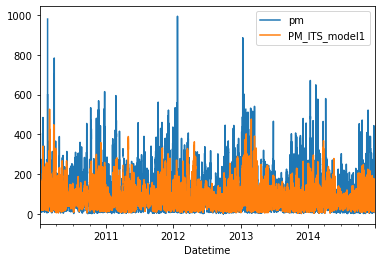

In [26]:
# create predictions and save to variables
df['PM_ITS_model1'] = np.exp(results1.predict(df))
# plot the predictions and actual values
dfplot = df.filter(['pm', 'PM_ITS_model1'])
dfplot[['pm', 'PM_ITS_model1']].plot()

In [27]:
%%markdown
### 2. Second Model: model with one-day lag, season and day_time categorical variables

### 2. Second Model: model with one-day lag, season and day_time categorical variables


In [28]:
# build a model with formula
model_2 = sm.ols(formula="log_pm ~ Trend + log_lag_pm + C(season) + C(day_time)", data=df)
results2 = model_2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pm   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 1.018e+05
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:25:27   Log-Likelihood:                -5632.2
No. Observations:               41756   AIC:                         1.128e+04
Df Residuals:                   41750   BIC:                         1.133e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1759      0.007     26.106      0.000       0.163       0.189
C(season)[T.warm]         -0.0004      0.003     -0.144      0.886      -0.006       0.005
C(day_time)[T.morning]    -0.0326      0.003     -9.476      0.000      -0.039      -0.026
C(day_time)[T.night]      -0.0022      0.003     -0.646      0.518      -0.009       0.004
Trend                  -1.167e-07   1.13e-07     -1.037      0.300   -3.37e-07    1.04e-07
log_lag_pm                 0.9612      0.001    708.881      0.000       0.959       0.964
==============================================================================
Omnibus:                    13112.707   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           239729.141
Skew:                          -1.043   Prob(JB):                         0.00
Kurtosis:                      14.551   Cond. No.                     1.24e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='Datetime'>

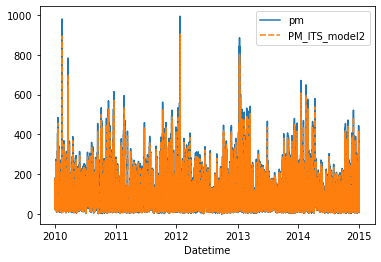

In [29]:
# create predictions and save to variable
df['PM_ITS_model2'] = np.exp(results2.predict(df))
# plot the predictions and actual data
dfplot = df.filter(['pm', 'PM_ITS_model2'])
sns.lineplot(data=dfplot)

<AxesSubplot:title={'center':'In-the-Sample Prediction'}, xlabel='Datetime'>

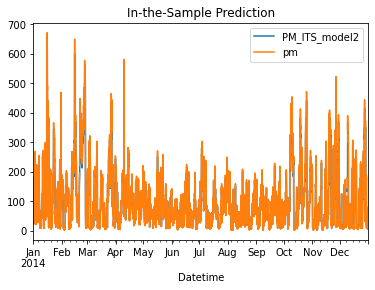

In [30]:
df[['PM_ITS_model2', 'pm']].tail(365*24).plot(title='In-the-Sample Prediction')

<AxesSubplot:title={'center':'In-the-Sample Prediction'}, xlabel='Datetime'>

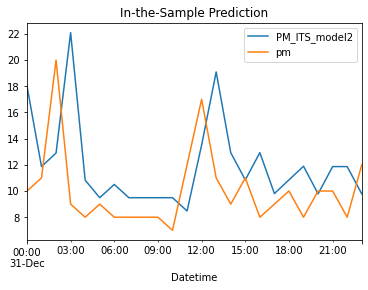

In [31]:
df[['PM_ITS_model2', 'pm']].tail(24).plot(title='In-the-Sample Prediction')

In [32]:
%%markdown
## Regression Out-of-Sample Prediction

## Regression Out-of-Sample Prediction


In [33]:
# build a model with formula
model_3 = sm.ols(formula="log_pm ~ Trend + log_lag_pm + C(season) + C(day_time)", data=df_train)
results3 = model_3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pm   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                 7.806e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:25:36   Log-Likelihood:                -4705.4
No. Observations:               33095   AIC:                             9423.
Df Residuals:                   33089   BIC:                             9473.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1794      0.008     23.462      0.000       0.164       0.194
C(season)[T.warm]          0.0011      0.003      0.365      0.715      -0.005       0.007
C(day_time)[T.morning]    -0.0293      0.004     -7.516      0.000      -0.037      -0.022
C(day_time)[T.night]      -0.0044      0.004     -1.161      0.246      -0.012       0.003
Trend                   -1.25e-07   1.61e-07     -0.778      0.437    -4.4e-07     1.9e-07
log_lag_pm                 0.9600      0.002    621.178      0.000       0.957       0.963
==============================================================================
Omnibus:                     9850.481   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169296.555
Skew:                          -0.983   Prob(JB):                         0.00
Kurtosis:                      13.904   Cond. No.                     9.86e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# create predictions and save to a variable
df['PM_OOS_model3'] = np.exp(results3.predict(df_test)) - 1

<AxesSubplot:title={'center':'Out-of-Sample Prediction'}, xlabel='Datetime'>

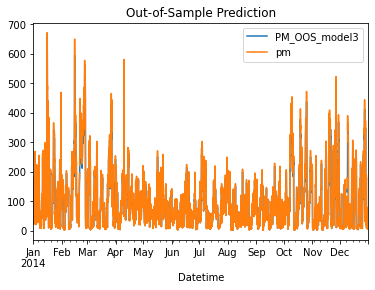

In [35]:
# plot predictions and actual values (whole time period)
df[['PM_OOS_model3', 'pm']].tail(365*24).plot(title="Out-of-Sample Prediction")

<AxesSubplot:title={'center':'In/Out-of-Sample Prediction'}, xlabel='Datetime'>

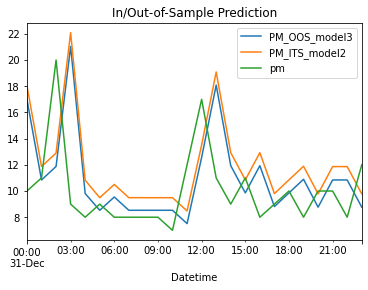

In [36]:
df[['PM_OOS_model3', 'PM_ITS_model2', 'pm']].tail(24).plot(title="In/Out-of-Sample Prediction")

<AxesSubplot:xlabel='Datetime'>

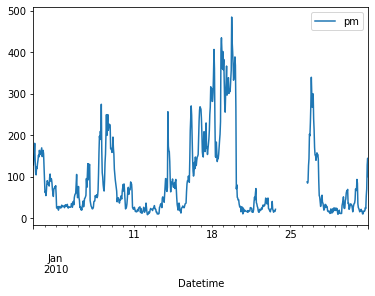

In [37]:
# plot predictions and actual values (first month)
df[0:24*30].filter(['pm', 'pm_forecast_ITS']).plot()

In [38]:
%%markdown
## Regression: Including Independent Variables

## Regression: Including Independent Variables


In [39]:
# look at correlation between the independent variables and the independent one
df.corr()['pm']

year            -0.014690
month           -0.024069
day              0.082788
hour            -0.023116
pm               1.000000
DEWP             0.171423
TEMP            -0.090533
PRES            -0.047282
Iws             -0.248389
Is               0.019266
Ir              -0.051369
Trend           -0.018218
log_pm           0.866939
log_lag_pm       0.841785
log_lag_pm2      0.809537
log_lag_pm24     0.383738
PM_ITS_model1    0.637903
PM_ITS_model2    0.964798
PM_OOS_model3    0.972108
Name: pm, dtype: float64

In [40]:
%%markdown
### In-Sample

### In-Sample


In [41]:
model4 = sm.ols(formula="log_pm ~ Trend + log_lag_pm + C(season)+ C(day_time) + DEWP + Iws", data=df)
results4 = model4.fit()
results4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pm   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 7.326e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:25:39   Log-Likelihood:                -5479.5
No. Observations:               41756   AIC:                         1.098e+04
Df Residuals:                   41748   BIC:                         1.104e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.2590      0.008     31.430      0.000       0.243       0.275
C(season)[T.warm]         -0.0315      0.004     -8.649      0.000      -0.039      -0.024
C(day_time)[T.morning]    -0.0353      0.003    -10.293      0.000      -0.042      -0.029
C(day_time)[T.night]      -0.0026      0.003     -0.765      0.445      -0.009       0.004
Trend                  -3.713e-07   1.13e-07     -3.283      0.001   -5.93e-07    -1.5e-07
log_lag_pm                 0.9483      0.002    616.356      0.000       0.945       0.951
DEWP                       0.0015      0.000     11.304      0.000       0.001       0.002
Iws                       -0.0003   2.98e-05    -11.253      0.000      -0.000      -0.000
==============================================================================
Omnibus:                    13083.833   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238509.977
Skew:                          -1.041   Prob(JB):                         0.00
Kurtosis:                      14.522   Cond. No.                     1.53e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
%%markdown
### Independent variables do not add any value to this model

### Independent variables do not add any value to this model


In [43]:
%%markdown
## Regression: with second lag added

## Regression: with second lag added


In [44]:
%%markdown
### In-the-sample

### In-the-sample


In [45]:
model_5 = sm.ols(formula="log_pm ~ Trend + log_lag_pm + log_lag_pm2 + C(day_time)", data=df)
results5 = model_5.fit()
results5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pm   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.029e+05
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:25:40   Log-Likelihood:                -5414.6
No. Observations:               41755   AIC:                         1.084e+04
Df Residuals:                   41749   BIC:                         1.089e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1918      0.007     29.369      0.000       0.179       0.205
C(day_time)[T.morning]    -0.0302      0.003     -8.827      0.000      -0.037      -0.024
C(day_time)[T.night]      -0.0034      0.003     -1.027      0.304      -0.010       0.003
Trend                   -1.27e-07   1.12e-07     -1.134      0.257   -3.46e-07    9.24e-08
log_lag_pm                 1.0592      0.005    217.341      0.000       1.050       1.069
log_lag_pm2               -0.1019      0.005    -20.922      0.000      -0.111      -0.092
==============================================================================
Omnibus:                    12774.213   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           236809.951
Skew:                          -1.001   Prob(JB):                         0.00
Kurtosis:                      14.494   Cond. No.                     1.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='Datetime'>

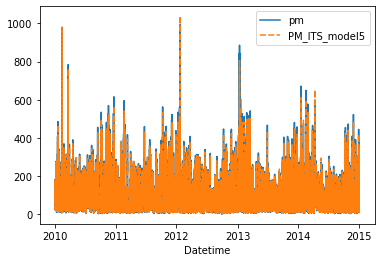

In [46]:
# create predictions and save to variable
df['PM_ITS_model5'] = np.exp(results5.predict(df))
# plot the predictions and actual data
dfplot = df.filter(['pm', 'PM_ITS_model5'])
sns.lineplot(data=dfplot)

<AxesSubplot:title={'center':'In-the-Sample Prediction'}, xlabel='Datetime'>

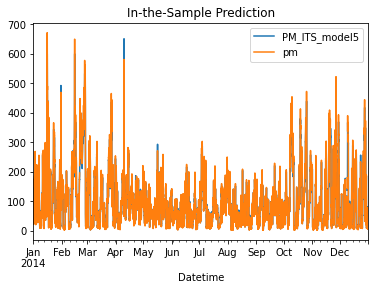

In [47]:
df[['PM_ITS_model5', 'pm']].tail(365*24).plot(title='In-the-Sample Prediction')

In [48]:
%%markdown
### Out-of-Sample

### Out-of-Sample


In [49]:
model_6 = sm.ols(formula="log_pm ~ Trend + log_lag_pm + log_lag_pm2 + C(day_time)", data=df_train)
results6 = model_6.fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 log_pm   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                 7.889e+04
Date:                Wed, 15 Jun 2022   Prob (F-statistic):               0.00
Time:                        00:25:47   Log-Likelihood:                -4543.2
No. Observations:               33094   AIC:                             9098.
Df Residuals:                   33088   BIC:                             9149.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0.1963      0.007     26.381      0.000       0.182       0.211
C(day_time)[T.morning]    -0.0273      0.004     -7.054      0.000      -0.035      -0.020
C(day_time)[T.night]      -0.0055      0.004     -1.462      0.144      -0.013       0.002
Trend                  -1.382e-07    1.6e-07     -0.865      0.387   -4.51e-07    1.75e-07
log_lag_pm                 1.0550      0.005    192.667      0.000       1.044       1.066
log_lag_pm2               -0.0988      0.005    -18.065      0.000      -0.110      -0.088
==============================================================================
Omnibus:                     9662.158   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           168996.636
Skew:                          -0.951   Prob(JB):                         0.00
Kurtosis:                      13.906   Cond. No.                     9.60e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.6e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [50]:
df['PM_OOS_model6'] = np.exp(results6.predict(df_test)) - 1

<AxesSubplot:title={'center':'In/Out-of-Sample Prediction'}, xlabel='Datetime'>

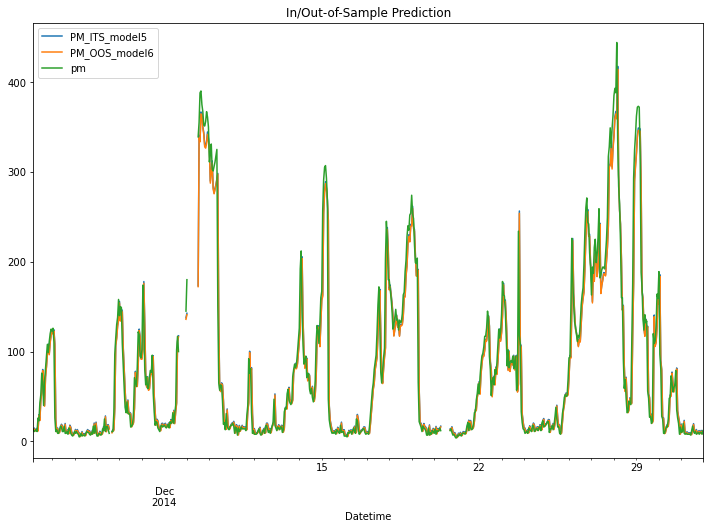

In [51]:
df[['PM_ITS_model5', 'PM_OOS_model6', 'pm']].tail(716).plot(title="In/Out-of-Sample Prediction", figsize=(12,8))

<AxesSubplot:title={'center':'In/Out-of-Sample Prediction'}, xlabel='Datetime'>

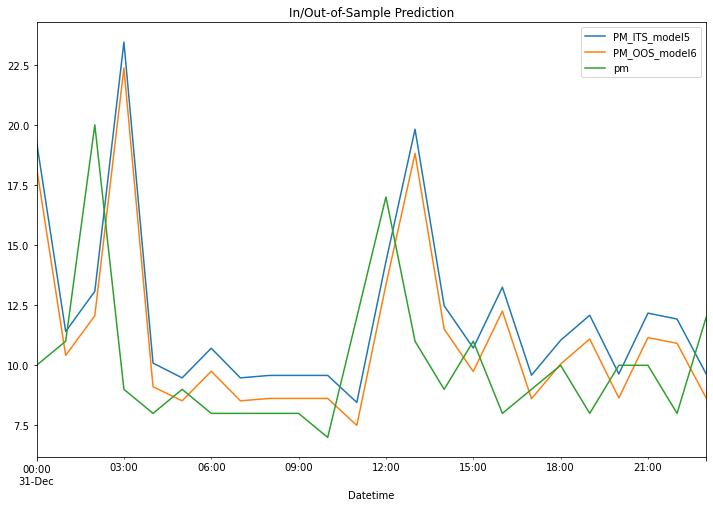

In [52]:
df[['PM_ITS_model5', 'PM_OOS_model6', 'pm']].tail(24).plot(title="In/Out-of-Sample Prediction", figsize=(12,8))

In [53]:
%%markdown
## Naive Forecast

## Naive Forecast


In [54]:
%%markdown
### Naive strategy: Mean

### Naive strategy: Mean


In [55]:
forecaster1 = NaiveForecaster(strategy='mean')
forecaster1.fit(df_train['pm'])
df['PM_Naive_Mean'] = forecaster1.predict(np.arange(1, len(df_test)))

<AxesSubplot:xlabel='Datetime'>

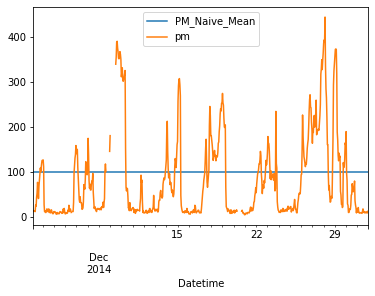

In [56]:
df[['PM_Naive_Mean', 'pm']].tail(716).plot()

In [57]:
forecaster2 = NaiveForecaster(strategy='last', sp=24)
forecaster2.fit(df_train['pm'])
df['PM_Naive_Last'] = forecaster2.predict(np.arange(1, len(df_test)))

<AxesSubplot:xlabel='Datetime'>

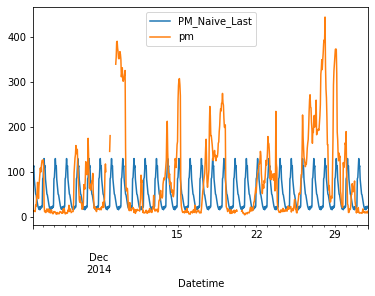

In [58]:
df[['PM_Naive_Last', 'pm']].tail(716).plot()

In [59]:
%%markdown 
## Error metrics: comparing models

## Error metrics: comparing models


In [60]:
cols_pred = ['PM_ITS_model1', 'PM_ITS_model2', 'PM_OOS_model3', 'PM_ITS_model5', 'PM_OOS_model6', 'PM_Naive_Mean', 'PM_Naive_Last', 'pm']
df_metrics = df[cols_pred].dropna()

mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
models, rmse, mae, mape = list(), list(), list(), list()
for col in cols_pred:
    models.append(col)
    rmse.append(np.sqrt(mean_squared_error(df_metrics['pm'].tail(716), df_metrics[col].tail(716))))
    mae.append(mean_absolute_error(df_metrics['pm'].tail(716), df_metrics[col].tail(716)))
    mape.append(mean_absolute_percentage_error(df_metrics['pm'].tail(716), df_metrics[col].tail(716)))




In [61]:
metrics = pd.DataFrame({"model": models, "RMSE": rmse, "MAE": mae, "MAPE": mape})
metrics

,model,RMSE,MAE,MAPE
0,PM_ITS_model1,71.365032,42.995327,0.913404
1,PM_ITS_model2,25.101124,13.678408,0.292226
2,PM_OOS_model3,25.277471,13.739468,0.272935
3,PM_ITS_model5,24.896528,13.529297,0.292100
4,PM_OOS_model6,25.057736,13.593692,0.273919
5,PM_Naive_Mean,95.941920,79.754114,4.092641
6,PM_Naive_Last,101.351454,69.530726,2.244158
7,pm,0.000000,0.000000,0.000000


In [62]:
%%markdown
## ARIMA model

## ARIMA model


c:\Users\mi.martowicz\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2141: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


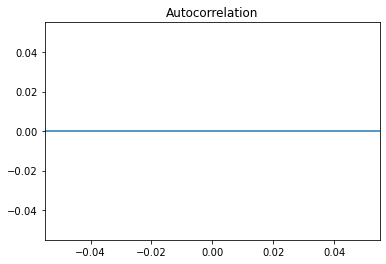

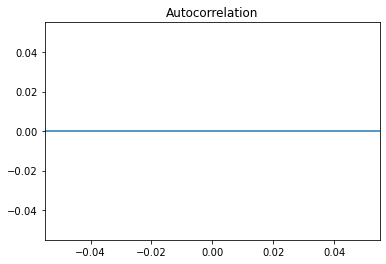

In [63]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.log_pm)


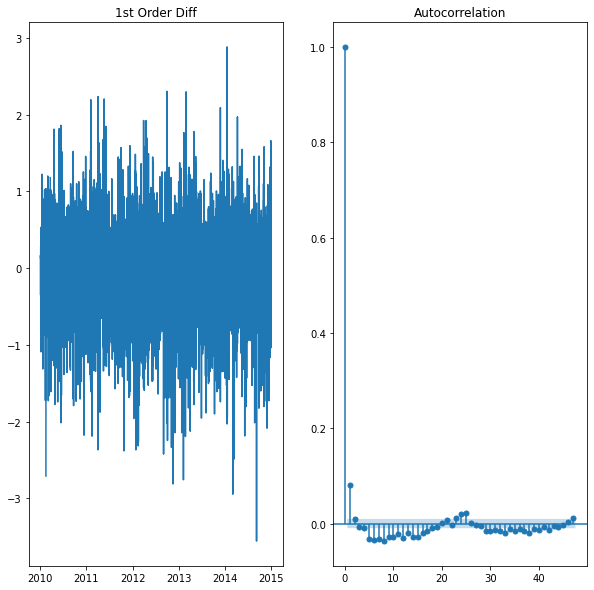

In [64]:
import matplotlib.pyplot as plt

f = plt.figure(figsize= (10,10))
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Diff')
ax1.plot(df.log_pm.diff())

ax2 = f.add_subplot(122)
plot_acf(df.log_pm.diff().dropna(), ax= ax2)
plt.show()

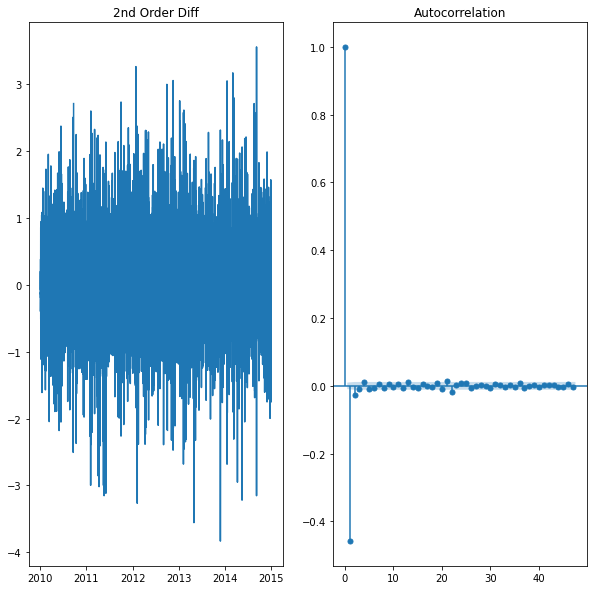

In [65]:
f = plt.figure(figsize= (10, 10))
ax1 = f.add_subplot(121)
ax1.set_title('2nd Order Diff')
ax1.plot(df.log_pm.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.log_pm.diff().diff().dropna(), ax = ax2)
plt.show()

In [66]:
from statsmodels.tsa.arima.model import ARIMA
df["log_pm"] = df["log_pm"].astype("int64")
df.dtypes

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
dftest = df.filter(['pm', 'log_pm', 'log_lag_pm'])

arima_model = ARIMA(dftest.pm, order=(2,0,1))
results_arima = arima_model.fit()
print(results_arima.summary())

In [ ]:
arima_model = ARIMA(dftest.pm, order=(2,1,1))
model  = arima_model.fit(disp=0)
print(model.summary())

In [ ]:
arima_model = ARIMA(dftest.pm, order=(2,2,1))
model  = arima_model.fit(disp=0)
print(model.summary())

In [ ]:
residuals = pd.DataFrame(results_arima.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [ ]:
# Actual vs Fitted
arima_model.plot_predict(dynamic=False)
plt.show()

In [ ]:
#arima_model = ARIMA(dftest.log_pm, order=(2,1,2))
#model  = arima_model.fit(disp=0)
#print(model.summary())

In [ ]:
dfarima = df.filter(['pm', 'log_pm', 'log_lag_pm'])
dfarima['log_lag_pm'] = np.exp(dfarima['log_lag_pm'])
dfarima = dfarima.dropna()
dfarima

In [ ]:
from statsmodels.tsa.stattools import acf

# Create Training and Test


train = dfarima.pm[:-10439]
test = dfarima.pm.tail(10439)

In [ ]:
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

In [ ]:
fc, se, conf = fitted.forecast(10439, alpha=0.95)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
fc, se, conf = fitted.forecast(10439, alpha=0.95)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()